In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from datetime import datetime as dt
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import pyximport
import numpy as np
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN

# Load results

In [229]:
def load_data(name):
    results = dict()
    results["K"] = np.load("results/" + name + "/K.npy")

    results["mae_userknn"] = np.load("results/" + name + "/mae_userknn.npy")
    results["mae_pop"] = np.load("results/" + name + "/mae_pop.npy")
    results["mae_gain"] = np.load("results/" + name + "/mae_gain.npy")
    results["mae_userknn_reuse"] = np.load("results/" + name + "/mae_userknn_reuse.npy")
    results["mae_pop_reuse"] = np.load("results/" + name + "/mae_pop_reuse.npy")
    results["mae_gain_reuse"] = np.load("results/" + name + "/mae_gain_reuse.npy")

    results["expbelow_userknn"] = np.load("results/" + name + "/expbelow_userknn.npy")
    results["expbelow_pop"] = np.load("results/" + name + "/expbelow_pop.npy")
    results["expbelow_gain"] = np.load("results/" + name + "/expbelow_gain.npy")
    results["expbelow_userknn_reuse"] = np.load("results/" + name + "/expbelow_userknn_reuse.npy")
    results["expbelow_pop_reuse"] = np.load("results/" + name + "/expbelow_pop_reuse.npy")
    results["expbelow_gain_reuse"] = np.load("results/" + name + "/expbelow_gain_reuse.npy")
    
    results["expall_userknn"] = np.load("results/" + name + "/expall_userknn.npy")
    results["expall_pop"] = np.load("results/" + name + "/expall_pop.npy")
    results["expall_gain"] = np.load("results/" + name + "/expall_gain.npy")
    results["expall_userknn_reuse"] = np.load("results/" + name + "/expall_userknn_reuse.npy")
    results["expall_pop_reuse"] = np.load("results/" + name + "/expall_pop_reuse.npy")
    results["expall_gain_reuse"] = np.load("results/" + name + "/expall_gain_reuse.npy")

    results["vuln_userknn"] = np.load("results/" + name + "/vuln_userknn.npy")
    results["vuln_pop"] = np.load("results/" + name + "/vuln_pop.npy")
    results["vuln_gain"] = np.load("results/" + name + "/vuln_gain.npy")
    results["vuln_userknn_reuse"] = np.load("results/" + name + "/vuln_userknn_reuse.npy")
    results["vuln_pop_reuse"] = np.load("results/" + name + "/vuln_pop_reuse.npy")
    results["vuln_gain_reuse"] = np.load("results/" + name + "/vuln_gain_reuse.npy")
    
    return results

In [230]:
name = "goodreads"
results = load_data(name)

In [231]:
%matplotlib inline

# Plotting
## nr. of neighbors vs. utility

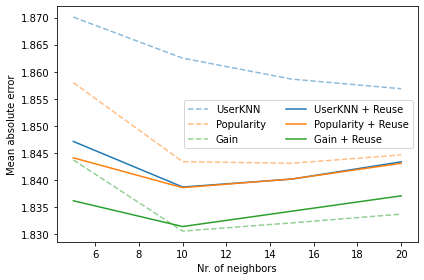

In [232]:
plt.figure(figsize=(6, 4))
plt.plot(results["K"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["K"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.xlabel("Nr. of neighbors")
plt.ylabel("Mean absolute error")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/k_vs_mae.png", dpi=300)

## exposure vs. utility

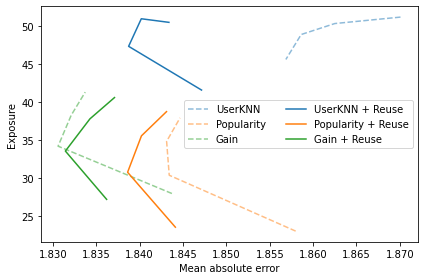

In [233]:
plt.figure(figsize=(6, 4))
plt.plot(results["mae_userknn"], results["expbelow_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["mae_pop"], results["expbelow_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["mae_gain"], results["expbelow_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["mae_userknn_reuse"], results["expbelow_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["mae_pop_reuse"], results["expbelow_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["mae_gain_reuse"], results["expbelow_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.xlabel("Mean absolute error")
plt.ylabel("Exposure")
plt.legend(ncol=2)
plt.tight_layout()
#plt.savefig("plots/" + name + "/exposure_vs_mae.png", dpi=300)

# vulnerable users

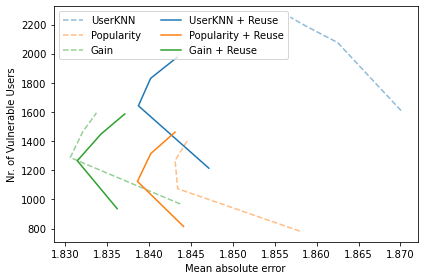

In [234]:
plt.plot(results["mae_userknn"], results["vuln_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["mae_pop"], results["vuln_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["mae_gain"], results["vuln_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["mae_userknn_reuse"], results["vuln_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["mae_pop_reuse"], results["vuln_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["mae_gain_reuse"], results["vuln_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.xlabel("Mean absolute error")
plt.ylabel("Nr. of Vulnerable Users")
plt.legend(ncol=2)
plt.tight_layout()
#plt.savefig("plots/" + name + "/hoover_vs_k.png", dpi=300)

In [235]:
ml100k_results = load_data("ml-100k")
ml1m_results = load_data("ml-1m")
jester_results = load_data("jester")
goodreads_results = load_data("goodreads")

In [236]:
def plot_exposure(ax, results, only_below=True):
    if only_below:
        group = "expbelow"
    else:
        group = "expall"
        
    ax.plot(results["mae_userknn"], results[group + "_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_pop"], results[group + "_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_gain"], results[group + "_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_userknn_reuse"], results[group + "_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["mae_pop_reuse"], results[group + "_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["mae_gain_reuse"], results[group + "_gain_reuse"], color="C2", linestyle="solid")

def plot_vulnerables(ax, results):
    ax.plot(results["mae_userknn"], results["vuln_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_pop"], results["vuln_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_gain"], results["vuln_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_userknn_reuse"], results["vuln_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["mae_pop_reuse"], results["vuln_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["mae_gain_reuse"], results["vuln_gain_reuse"], color="C2", linestyle="solid")

In [237]:
%matplotlib qt

In [239]:
fig, axes = plt.subplots(1, 4, figsize=(9, 4), sharex=False)
plot_exposure(axes[0], ml100k_results, only_below=True)
plot_exposure(axes[1], ml1m_results, only_below=True)
plot_exposure(axes[2], jester_results, only_below=True)
plot_exposure(axes[3], goodreads_results, only_below=True)

axes[0].set_ylabel("Avg. privacy risk")
axes[0].set_xlabel("Mean absolute error")
axes[1].set_xlabel("Mean absolute error")
axes[2].set_xlabel("Mean absolute error")
axes[3].set_xlabel("Mean absolute error")
axes[0].set_title("MovieLens 100k")
axes[1].set_title("MovieLens 1M")
axes[2].set_title("Jester")
axes[3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes)

# Vulnerable neighbors + trade-off below threshold

In [250]:
fig, axes = plt.subplots(2, 4, figsize=(9, 6), sharex=False)
plot_exposure(axes[0, 0], ml100k_results)
plot_exposure(axes[0, 1], ml1m_results)
plot_exposure(axes[0, 2], jester_results)
plot_exposure(axes[0, 3], goodreads_results)

plot_vulnerables(axes[1, 0], ml100k_results)
plot_vulnerables(axes[1, 1], ml1m_results)
plot_vulnerables(axes[1, 2], jester_results)
plot_vulnerables(axes[1, 3], goodreads_results)

axes[0, 0].set_ylabel("Avg. privacy risk")
axes[1, 0].set_xlabel("Mean absolute error")
axes[1, 1].set_xlabel("Mean absolute error")
axes[1, 2].set_xlabel("Mean absolute error")
axes[1, 3].set_xlabel("Mean absolute error")
axes[1, 0].set_ylabel("Nr. of vulnerables")
axes[0, 0].set_title("MovieLens 100k")
axes[0, 1].set_title("MovieLens 1M")
axes[0, 2].set_title("Jester")
axes[0, 3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes)

# Intro Figure

In [ ]:
%matplotlib qt
data_df = pd.read_csv("data/ml-100k/u.data", sep="\t")
data_df.columns = ["user_id", "item_id", "rating", "timestamp"]
data_df.drop(columns=["timestamp"], axis=1, inplace=True)
data_df["user_id"] = data_df["user_id"].map({b: a for a, b in enumerate(data_df["user_id"].unique())})
data_df["item_id"] = data_df["item_id"].map({b: a for a, b in enumerate(data_df["item_id"].unique())})

reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(data_df, reader=reader)
trainset, testset = train_test_split(dataset, 0.2)
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)

model = UserKNN(k=10)
model.fit(trainset)
_ = model.test(testset)
userknn_scores = np.zeros((model.trainset.n_users))
userknn_scores = model.n_queries
counts, edges = np.histogram(userknn_scores, bins=25)
kde = KernelDensity(bandwidth=100.0, kernel='gaussian')
kde.fit(counts.reshape(-1, 1))
x = np.linspace(0, np.max(edges), 1000)
logprob = kde.score_samples(x.reshape(-1, 1))
x_ = np.exp(logprob)
ax[0].hist(userknn_scores, bins=25)
threshold = x[np.argmax(np.gradient(np.gradient(np.exp(logprob))))]

model = UserKNN(k=10, tau_4=0.5, reuse=True)
model.fit(trainset)
_ = model.test(testset)
reuseknn_scores = np.zeros((model.trainset.n_users))
reuseknn_scores = model.n_queries
counts, edges = np.histogram(reuseknn_scores, bins=25)
kde = KernelDensity(bandwidth=100.0, kernel='gaussian')
kde.fit(counts.reshape(-1, 1))
x = np.linspace(0, np.max(edges), 1000)
logprob = kde.score_samples(x.reshape(-1, 1))
x_ = np.exp(logprob)
ax[1].hist(reuseknn_scores, bins=edges)

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  from ipykernel import kernelapp as app


In [4]:
threshold

185.05405405405403

In [227]:
%matplotlib qt
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
a = 5
rv = powerlaw(a)
x = np.linspace(powerlaw.ppf(0.01, a), powerlaw.ppf(1, a), 99)
x_ = rv.pdf(x)[::-1]
ax[0].set_yticks([])
ax[0].set_ylabel("Users")
#ax[0].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[0].set_xticks([])
ax[0].set_xlabel("Privacy Risk")
ax[0].fill_between(x[:33], 0, x_[:33], color="green", label="Low")
ax[0].fill_between(x[33:], 0, x_[33:], color="red", label="High")
threshold = x[33]
ax[0].axvline(threshold, color="black", linestyle="dashed", linewidth=1)
ax[0].legend(ncol=1, loc="upper right")
ax[0].set_title(r"$UserKNN$")

a = 10
rv = powerlaw(a)
x = np.linspace(powerlaw.ppf(0.000000001, a), powerlaw.ppf(1, a), 99)
x_ = rv.pdf(x)[::-1]
#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[1].set_xticks([])
ax[1].set_xlabel("Privacy Risk")
ax[1].fill_between(x[x < threshold], 0, x_[x < threshold], color="green", label="Low")
ax[1].fill_between(x[x > threshold], 0, x_[x > threshold], color="red", label="High")
ax[1].axvline(threshold, color="black", linestyle="dashed", linewidth=1)
ax[1].legend(ncol=1, loc="upper right")
ax[1].set_title(r"$ReuseKNN$")

Text(0.5, 1.0, '$ReuseKNN$')

In [353]:
%matplotlib qt
def double_exponential(x, alpha):
    return 1 / np.exp(np.exp(alpha * x))

fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)

x = np.linspace(0, 100, 1000)
x_ = double_exponential(x, alpha=0.02) * 0.5
threshold = x[np.argmax(np.gradient(np.gradient(x_)))]
ax[0].fill_between(x[x <= threshold], 0, x_[x <= threshold], color="green", label="Secure")
ax[0].fill_between(x[x > threshold][:-200], 0, x_[x > threshold][:-200], color="red", label="Vulnerable")
ax[0].axvline(x=threshold, c="gray", linestyle="dashed", linewidth=1)
ax[0].set_ylabel("Nr. of users")
ax[0].set_xlabel("Privacy risk")
#ax[0].set_yticks([])
#ax[0].set_xticks([])
ax[0].set_title(r"$UserKNN$")
ax[0].legend()

x = np.linspace(0, 100, 1000)
x_ = double_exponential(x, alpha=0.06) * 2
ax[1].fill_between(x[x <= threshold], 0, x_[x <= threshold], color="green", label="Secure")
ax[1].fill_between(x[x > threshold], 0, x_[x > threshold], color="red", label="Vulnerable")
x_ = double_exponential(x, alpha=0.06) * 0.2
ax[1].fill_between(np.linspace(95, 100, 200), 0, x_[:200][::-1] * 0.5, color="red")
#plt.plot(np.linspace(90, 100, 200), x_[:200][::-1]*0.5)
ax[1].axvline(x=threshold, c="gray", linestyle="dashed", linewidth=1)
ax[1].set_xlabel("Privacy risk")
ax[1].set_title(r"$ReuseKNN$")
ax[1].legend()

In [350]:
x_ = double_exponential(x, alpha=0.06) * 0.1
plt.plot(np.linspace(95, 100, 200), x_[:200][::-1], color="red")